# [IAPR 2020:][iapr2020] Lab 1 ‒  Image segmentation

**Author:** Quentin Talon, Albéric de Lajarte, Zeno Messi
**Due date:** 26.03.2020

[iapr2018]: https://github.com/LTS5/iapr-2020

## Extract relevant data
We first need to extract the `lab-01-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-01-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Part 1: Brain segmentation

Your goal: compute the size of the brain (in pixels) in a 2D image of a human head taken by Magnetic Resonance Imaging (MRI).
* Try as many methods as you can, the more the better.
* At least region growing and contour detection.

### 1.1 Brain image visualization

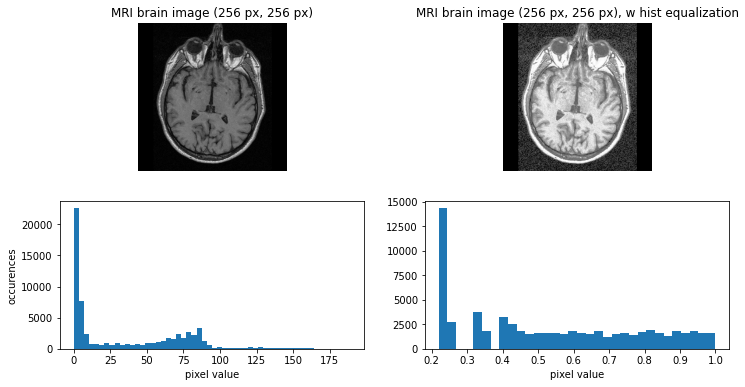

In [2]:
import skimage.io
import matplotlib.pyplot as plt
from skimage import exposure
import numpy as np
%matplotlib inline

# Load image
data_path = os.path.join(data_base_path, data_folder)
brain_im = skimage.io.imread(os.path.join(data_path, 'brain-slice40.tiff'))
im_h, im_w = brain_im.shape

fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(12, 6))
ax1.imshow(brain_im, cmap='gray')
ax2.imshow(exposure.equalize_hist(brain_im), cmap='gray')
ax1.set_title('MRI brain image ({} px, {} px)'.format(im_h, im_w))
ax2.set_title('MRI brain image ({} px, {} px), w hist equalization'.format(im_h, im_w))
ax1.axis('off')
ax2.axis('off')
ax3.hist(x=brain_im.ravel(), bins='auto')
ax3.set_xlabel("pixel value"); ax3.set_ylabel("occurences")
ax4.hist(x=exposure.equalize_hist(brain_im).ravel(), bins='auto')
ax4.set_xlabel("pixel value"); ax3.set_ylabel("occurences")
plt.show()

### 1.2 Region growing
We can't guess what a brain is. Thus, we want to get a region of interest at some value. Lets use (101, 138) (Use %matplotlib ipympl to have the coordinates shown in the notebook).

In [3]:
print('Value at (101, 138) = {}'.format(brain_im[101,138]))

Value at (101, 138) = 67


We then manually select the boundaries of pixel values of what the brain might be.

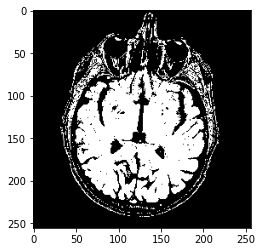

In [4]:
brain_im_bin=np.where((brain_im>60) & (brain_im<95),1,0)
plt.imshow(brain_im_bin, cmap='gray')
plt.show()

Depth-First Search algorithm

In [5]:
def DFS(G, s):
    G[s[0], s[1]] = -1
    for t in [[s[0]+i,s[1]+j] for i,j in [[1,0], [0,1], [-1,0], [0,-1]]]: #4 neighbour
        try:#Dirty way of avoiding error of out of array
            if G[t[0], t[1]] == 1:#The region have a value of 1
                DFS(G, t)
        except:
            continue

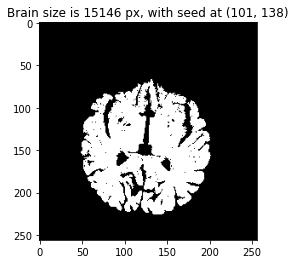

In [6]:
import sys
sys.setrecursionlimit(im_h*im_w)#To be able to go deep enough

seeds = [[101, 138]]
for s in seeds:
    brain_im_bin=np.where((brain_im>60) & (brain_im<95),1,0)#As we change the argument of explorer()
    DFS(G=brain_im_bin,s=s)
    my_brain = brain_im_bin == -1 #Have to be the value set in DFS
    size = np.count_nonzero(my_brain)#Look for True values in my_brain and count them
    plt.imshow(my_brain, cmap='gray')
    plt.title("Brain size is {} px, with seed at ({}, {})".format(size, s[0], s[1]))
    plt.show()

It could also be possible to map every connected surface and choose the largest one.

### 1.3 Contour detection
Add your implementation and discussion

### 1.4 Additional method(s)
Add your implementation and discussion

0

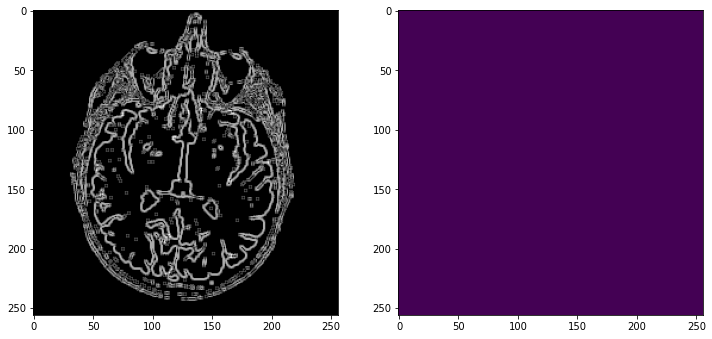

In [7]:
from scipy import ndimage as ndi
from skimage.filters import roberts, sobel, scharr, prewitt
from skimage.segmentation import watershed

#brain_edge = ndi.gaussian_laplace(brain_im_bin, sigma=0.5).astype(np.float64)
brain_edge = prewitt(brain_im_bin)

markers = np.zeros_like(brain_edge)
markers[brain_im_bin < 30] = 1
markers[brain_im_bin > 200] = 2

segmentation = watershed(brain_edge, markers)
segmentation = ndi.binary_fill_holes(segmentation - 1, structure=np.ones((10,10)))
labeled_brain, _ = ndi.label(segmentation)

#labeled_brain[(labeled_brain>150) & (labeled_brain<200)] = 200
labeled_brain[labeled_brain != 151] = 0
labeled_brain[labeled_brain == 151] = 1

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 12))
ax1.imshow(brain_edge, cmap='gray')
ax2.imshow(labeled_brain)

plt.show

100*np.sum(labeled_brain)/labeled_brain.size
np.sum(labeled_brain)

## Part 2: Shape/color segmentation

You will find hereafter three pictures taken under three different illuminations, containing some shapes with different colors. We ask you to create a routine to:

1. Count the number of shapes of each color.
2. Compute the total area (in pixels) of each color.

Please note that one specific challenge is to be robust to illumination changes. Therefore some kind of intensity normalization should probably be used.

**Note:** the routine(s) that you will write for this exercise will be useful for the final project as well, so pay special attention to it.

### 2.1 Visualization

In [8]:
# Load images
im_names = ['arena-shapes-01', 'arena-shapes-02', 'arena-shapes-03']
filenames = [os.path.join(data_path, name) + '.png' for name in im_names]
ic = skimage.io.imread_collection(filenames)
images = skimage.io.concatenate_images(ic)
print('Number of images: ', images.shape[0])
print('Image size: {}, {} '.format(images.shape[1], images.shape[2]))
print('Number of color channels: ', images.shape[-1])

Number of images:  3
Image size: 480, 640 
Number of color channels:  3


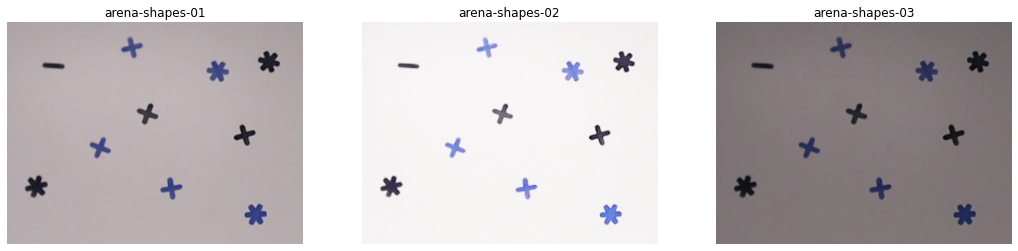

In [9]:
# Plot images
fig, axes = plt.subplots(1, 3, figsize=(18, 12))
for ax, im, nm in zip(axes.ravel(), images, im_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)
plt.show()

### 2.2 Number of shapes of each color
#### Get the image separated by color
Which method ?

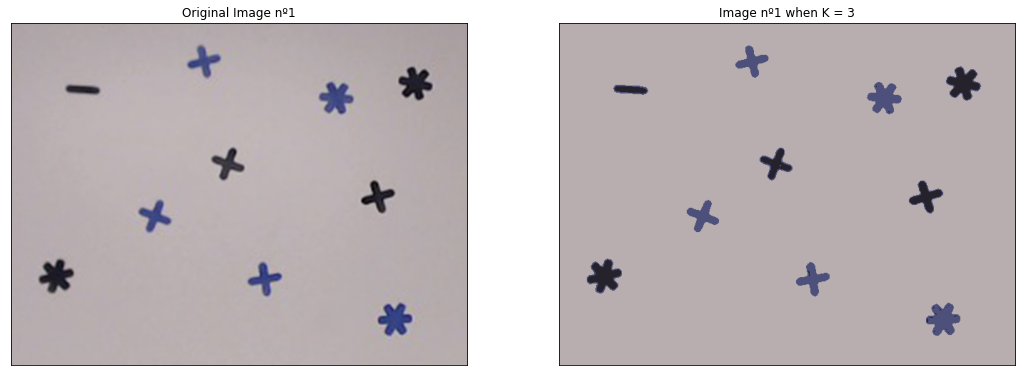

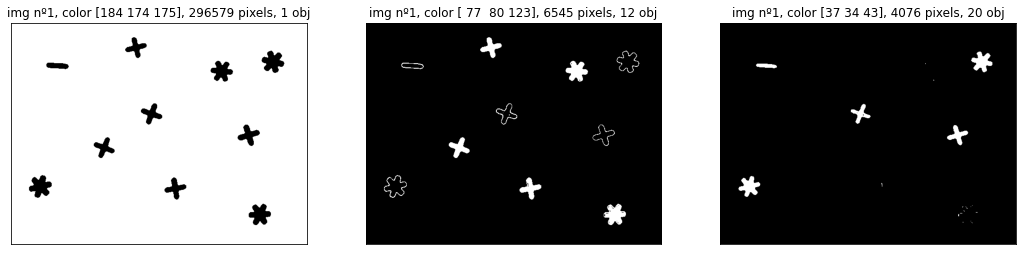

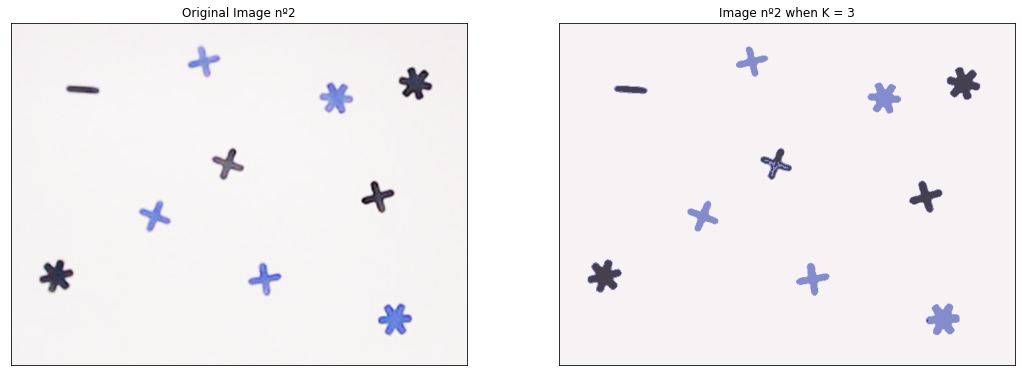

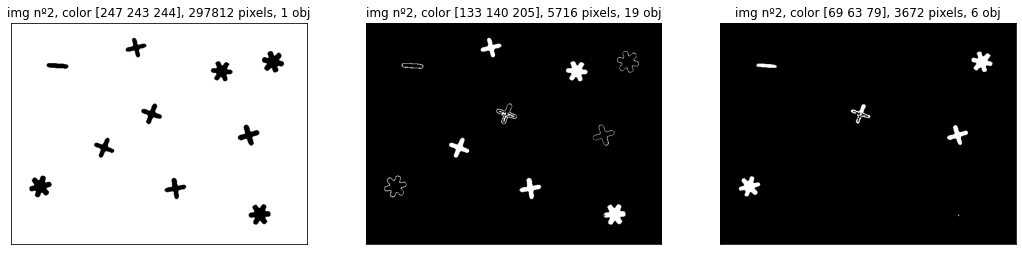

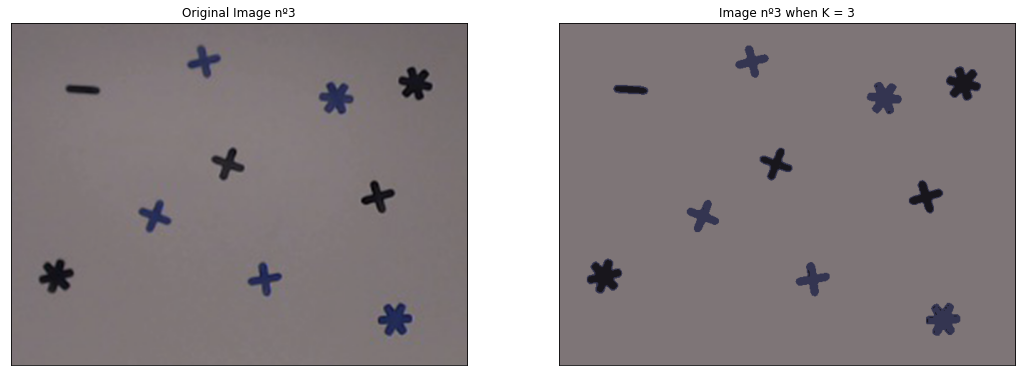

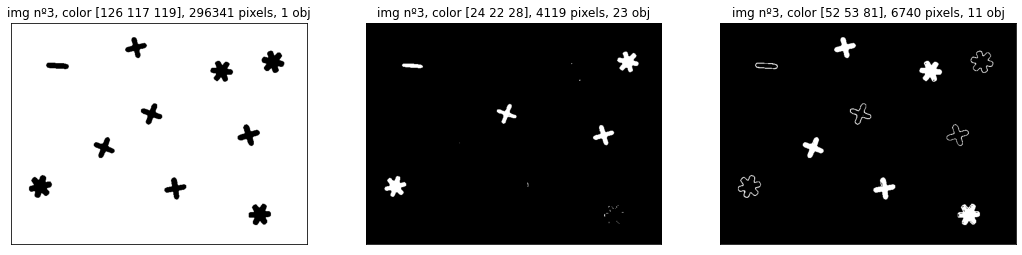

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import cv2
import scipy.ndimage.morphology as morph
from skimage.measure import label, regionprops

#img = images[0]
K = 3 #
for i, img_original in enumerate(images):
    img = img_original
    #img = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
    #img = cv2.cvtColor(img_original, cv2.COLOR_BGR2YUV)#One can try different vision
    if False:
        r, g, b = cv2.split(img)
        r = r.flatten()
        g = g.flatten()
        b = b.flatten()
        #plotting
        fig = plt.figure()
        ax = Axes3D(fig)
        ax.scatter(r, g, b)
        plt.show()
    #----------
    vectorized = np.float32(img.reshape((-1,3)))
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    attempts=10
    ret,labels,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    res = center[labels.flatten()]
    result_image = res.reshape((img.shape))
    #-------------
    figure_size = 18
    plt.figure(figsize=(figure_size,figure_size))#Original
    plt.subplot(1,2,1),plt.imshow(img_original)
    plt.title('Original Image nº{}'.format(i+1)), plt.xticks([]), plt.yticks([])
    plt.subplot(1,2,2),plt.imshow( result_image)
    plt.title('Image nº{} when K = {}'.format(i+1, K)), plt.xticks([]), plt.yticks([])
    fig, axes = plt.subplots(1,K, figsize=(18,8))
    for c, ax in zip(center, axes):#c is a color
        f = np.where((result_image[:,:,0] == c[0]) & (result_image[:,:,1] == c[1]) & (result_image[:,:,2] == c[2]), 1, 0) 
        f = morph.binary_opening(f, np.ones((1,1)))#Remove small ones (not so robust)
        f = morph.binary_dilation(f, np.ones((1,1)))#Make big ones bigger (not so robust)
        ax.imshow(f, cmap="gray")
        ax.set_title("img nº{}, color {}, {} pixels, {} obj".format(i+1, c, np.count_nonzero(f), np.amax(label(f))))
        ax.set_xticks([]), ax.set_yticks([])#ax.axis('off')
    plt.savefig("Image_{}.png".format(i))
    plt.show()


Now we have images with 3 colors. Changing the number of color (K) could be implemeted too.
We can do a region growing, count the size of each region, make an histogram of these sizes and take the highest group in these.

### Description of our algorithm
#### 
We have chosen to fix $K=3$ here in the code as we have only 3 colors to match. If the "real" problem is kept with a known number of color, this is the best choice. Otherwhise it is possible to search the right number of colors. This finding of number of colors would be less robust than giving a fixed value.

### 2.3 Total area (in pixels) of each color

It is implemented in the section 2.2